In [55]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp
from mpl_toolkits.mplot3d import Axes3D

In [56]:
a=1e-8
w=1
v=1
K=0.5
rho=1
tau=1
beta=100
gamma=1
t_start=0
t_end=100


In [57]:

B_init=1e6
I_init=0
P_init=1e3
S_init=1
initialState=[B_init,I_init,P_init,S_init]


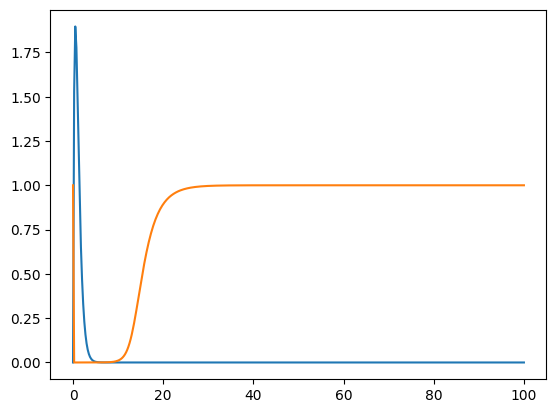

In [58]:

def odeModel(t,y):
    B,I,P,S=y
    B_dot=v*B*(S/(S+K)) - B*(rho-a*w*P)
    I_dot=a*w*B*P - I*(rho + 1/tau)
    P_dot=-P*(rho + a*(B+I)) + beta*(I/tau)
    S_dot=rho*(resourceFlow()-S) - gamma*v*B*(S/(S+K))

    return [B_dot,I_dot,P_dot,S_dot]

def resourceFlow():
    return 1

solution = solve_ivp(odeModel,[t_start,t_end],initialState,method='RK45',t_eval=np.linspace(t_start, t_end, 400))

B_sol=solution.y[0]
I_sol=solution.y[1]
P_sol=solution.y[2]
S_sol=solution.y[3]
plt.plot(solution.t,I_sol)
plt.plot(solution.t,S_sol)
plt.show()


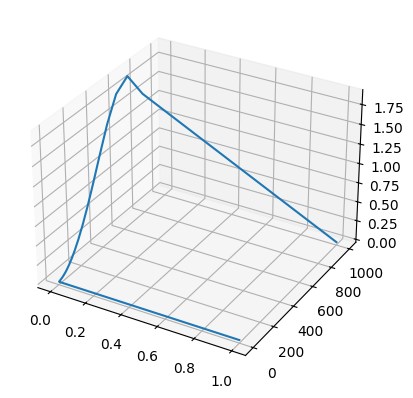

In [59]:

ax = plt.axes(projection='3d')
ax.plot3D(S_sol,P_sol,I_sol)
plt.show()